# Análise Exploratória e Descritiva dos Dados

Este notebook apresenta a análise exploratória e descritiva dos dados de vendas (sell-out) do Grupo Boticário. O objetivo é identificar padrões, tendências e possíveis problemas nos dados que podem influenciar o modelo de previsão.

**USANDO PYTHON 3.13 COMO CONSTA NO DOCKERFILE**
---

## Dicionário de Dados

| Feature                | Tipo Variável   | Descrição                                                                |
|------------------------|-----------------|--------------------------------------------------------------------------|
| `COD_CICLO`           | Ordinal         | Indicação de período definido por marketing                              |
| `FLG_DATA_COMEMORATIVA`| FLAG            | Indicação se o ciclo pertence a alguma data comemorativa nacional        |
| `COD_MATERIAL`         | Categórica      | Código referente ao material – SKU                                       |
| `COD_CANAL`            | Categórica      | Em qual canal de vendas foi efetuada a venda do período                  |
| `DES_CATEGORIA_MATERIAL`| Categórica      | Qual a categoria do material                                             |
| `DES_MARCA_MATERIAL`   | Categórica      | Qual a marca do material                                                 |
| `COD_REGIAO`           | Categórica      | Região a qual foi efetuada a venda                                       |
| `QT_VENDA_BRUTO`       | Contínua        | Quantidade de itens vendidos                                             |
| `QT_DEVOLUCAO`         | Contínua        | Quantidade de itens devolvidos                                           |
| `VL_RECEITA_BRUTA`     | Contínua        | Valor da receita bruta                                                   |
| `VL_RECEITA_LIQUIDA`   | Contínua        | Valor da receita líquida                                                 |
| `FLG_CAMPANHA_MKT_A`   | FLAG            | Campanha de Marketing – TIPO A                                           |
| `FLG_CAMPANHA_MKT_B`   | FLAG            | Campanha de Marketing – TIPO B                                           |
| `FLG_CAMPANHA_MKT_C`   | FLAG            | Campanha de Marketing – TIPO C                                           |
| `FLG_CAMPANHA_MKT_D`   | FLAG            | Campanha de Marketing – TIPO D                                           |
| `FLG_CAMPANHA_MKT_E`   | FLAG            | Campanha de Marketing – TIPO E                                           |
| `PCT_DESCONTO`         | Contínua        | Percentual de desconto feito por Marketing                               |
| `VL_PRECO`             | Contínua        | Valor do preço do Produto                                                |

---

Importação de Bibliotecas e Configurações

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
file_path = "../data/raw/dataset.csv"
dataset = pd.read_csv(file_path, sep=";", decimal=",")

In [181]:
dataset_head = dataset.head()
dataset_info = dataset.info()

dataset_head, dataset_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173923 entries, 0 to 173922
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COD_CICLO               173923 non-null  int64  
 1   FLG_DATA                173923 non-null  int64  
 2   COD_MATERIAL            173923 non-null  int64  
 3   COD_CANAL               173923 non-null  object 
 4   DES_CATEGORIA_MATERIAL  173923 non-null  object 
 5   DES_MARCA_MATERIAL      173923 non-null  object 
 6   COD_REGIAO              173923 non-null  object 
 7   QT_VENDA_BRUTO          173923 non-null  float64
 8   QT_DEVOLUCAO            87164 non-null   float64
 9   VL_RECEITA_BRUTA        173923 non-null  float64
 10  VL_RECEITA_LIQUIDA      173923 non-null  float64
 11  FLG_CAMPANHA_MKT_A      173923 non-null  int64  
 12  FLG_CAMPANHA_MKT_B      173923 non-null  int64  
 13  FLG_CAMPANHA_MKT_C      173923 non-null  int64  
 14  FLG_CAMPANHA_MKT_D  

(   COD_CICLO  FLG_DATA  COD_MATERIAL COD_CANAL DES_CATEGORIA_MATERIAL  \
 0     201917         1        431148   anon_S0                anon_S2   
 1     202005         0        177816   anon_S0                anon_S2   
 2     201901         0        171786   anon_S0                anon_S5   
 3     201813         0        177774   anon_S7                anon_S2   
 4     202006         1        446592   anon_S0                anon_S5   
 
   DES_MARCA_MATERIAL COD_REGIAO  QT_VENDA_BRUTO  QT_DEVOLUCAO  \
 0            anon_S3    anon_S1         11934.0         414.0   
 1            anon_S4    anon_S1           540.0         252.0   
 2            anon_S6    anon_S1         54012.0        1410.0   
 3            anon_S8    anon_S1           438.0           NaN   
 4            anon_S9    anon_S1          2760.0         240.0   
 
    VL_RECEITA_BRUTA  VL_RECEITA_LIQUIDA  FLG_CAMPANHA_MKT_A  \
 0         431869.08           431869.08                   0   
 1          27743.40        

In [182]:
# Resumo geral do dataset
missing_values = dataset.isnull().sum()
summary_statistics = dataset.describe(include="all")

# Mostrar variáveis numéricas
numerical_features = dataset.select_dtypes(include=["float64", "int64"]).columns
numerical_summary = dataset[numerical_features].describe()

# Contagem de valores ausentes
missing_values_summary = missing_values[missing_values > 0]

missing_values_summary, numerical_summary

(QT_DEVOLUCAO     86759
 PCT_DESCONTO    116972
 dtype: int64,
            COD_CICLO       FLG_DATA   COD_MATERIAL  QT_VENDA_BRUTO  \
 count  173923.000000  173923.000000  173923.000000    1.739230e+05   
 mean   201915.886553       0.289220  297755.596339    1.050377e+04   
 std        85.864130       0.453402  150472.609616    3.327551e+04   
 min    201801.000000       0.000000    6246.000000    2.345454e+02   
 25%    201815.000000       0.000000  152658.000000    3.960000e+02   
 50%    201911.000000       0.000000  420546.000000    2.070000e+03   
 75%    202006.000000       1.000000  439656.000000    8.634000e+03   
 max    202101.000000       1.000000  502386.000000    1.865862e+06   
 
        QT_DEVOLUCAO  VL_RECEITA_BRUTA  VL_RECEITA_LIQUIDA  FLG_CAMPANHA_MKT_A  \
 count  87164.000000      1.739230e+05        1.739230e+05       173923.000000   
 mean     491.800720      6.475499e+05        6.421887e+05            0.016956   
 std      722.866615      2.790452e+06        2.78

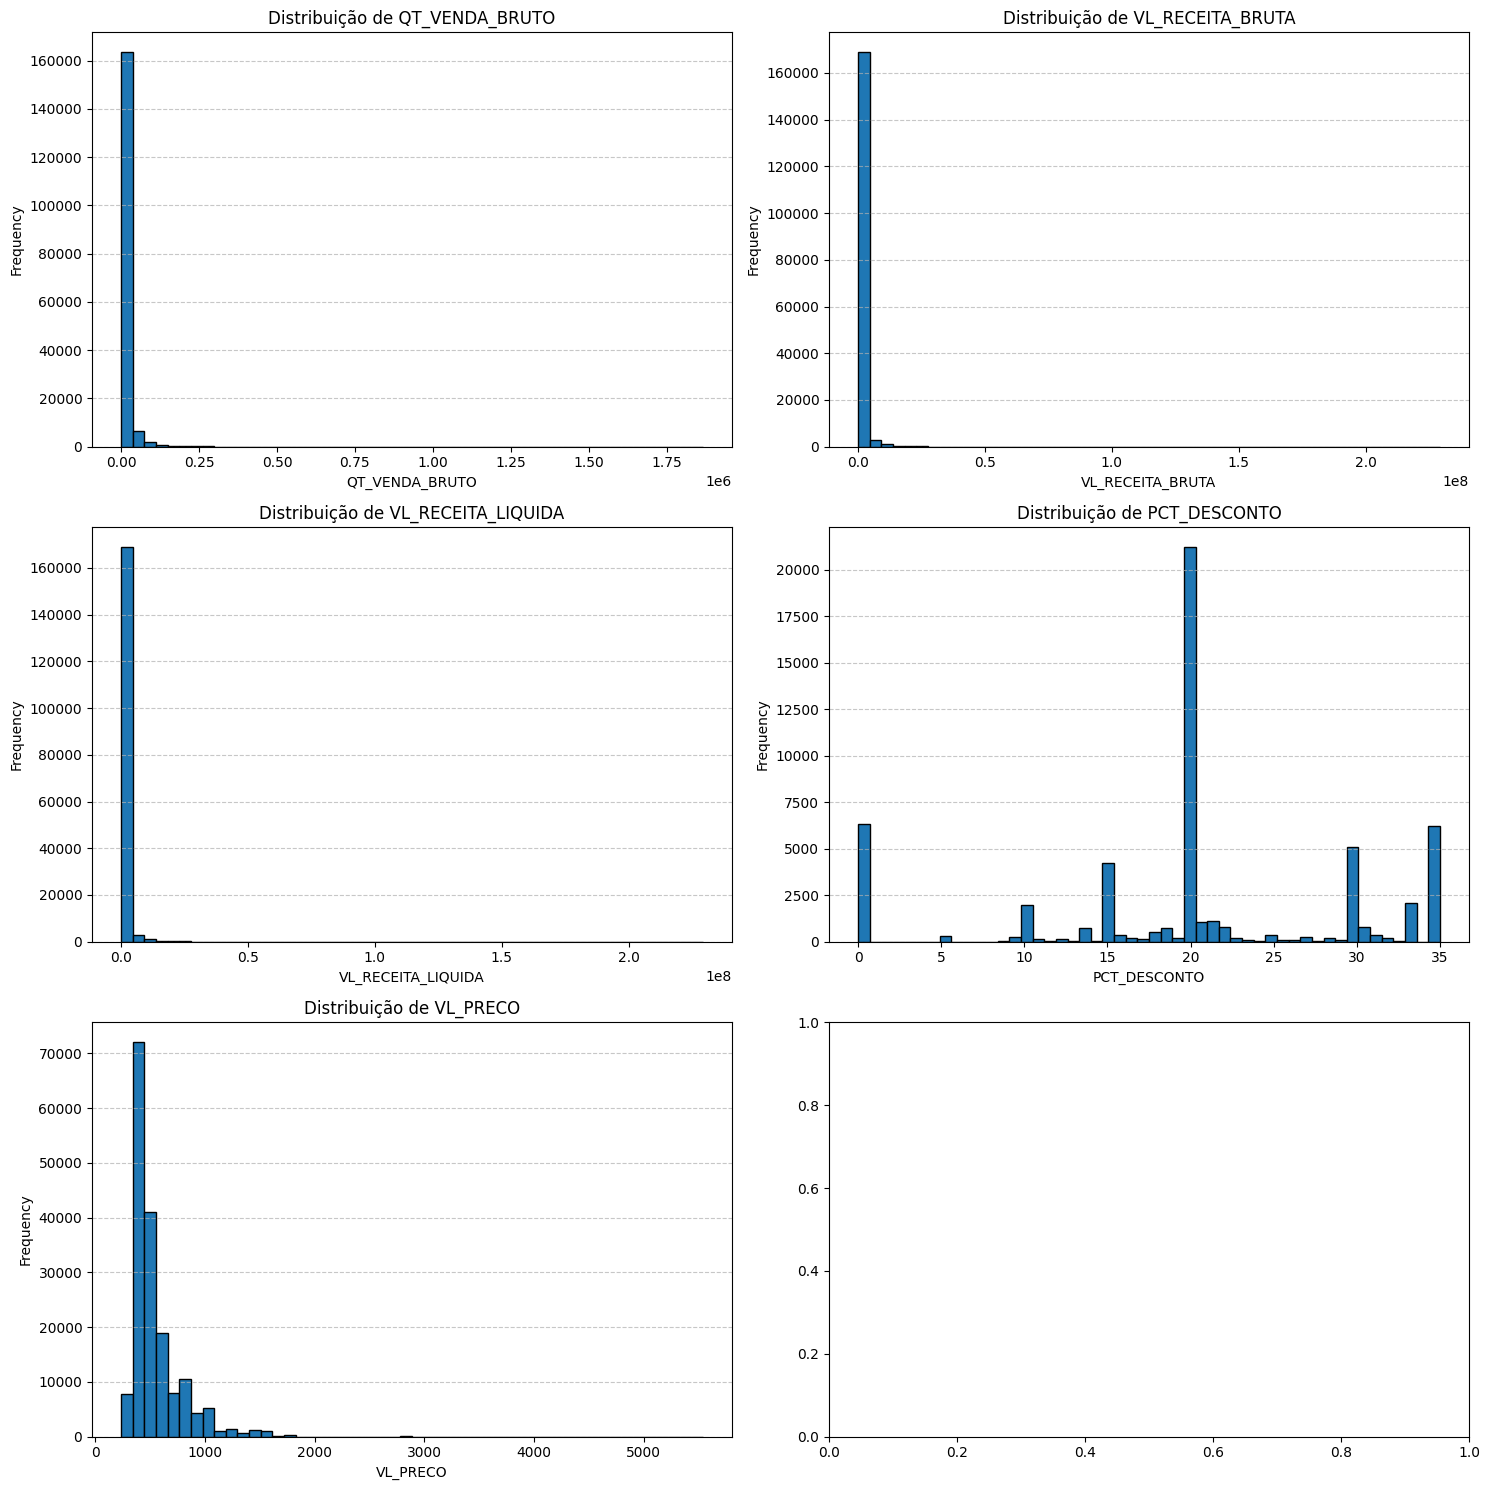

In [183]:
# Plotar a distribuição das variáveis numéricas principais
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Variáveis para plotar
variables_to_plot = [
    "QT_VENDA_BRUTO",
    "VL_RECEITA_BRUTA",
    "VL_RECEITA_LIQUIDA",
    "PCT_DESCONTO",
    "VL_PRECO",
]

for ax, var in zip(axes.flatten(), variables_to_plot):
    dataset[var].plot(
        kind="hist", bins=50, ax=ax, title=f"Distribuição de {var}", edgecolor="black"
    )
    ax.set_xlabel(var)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

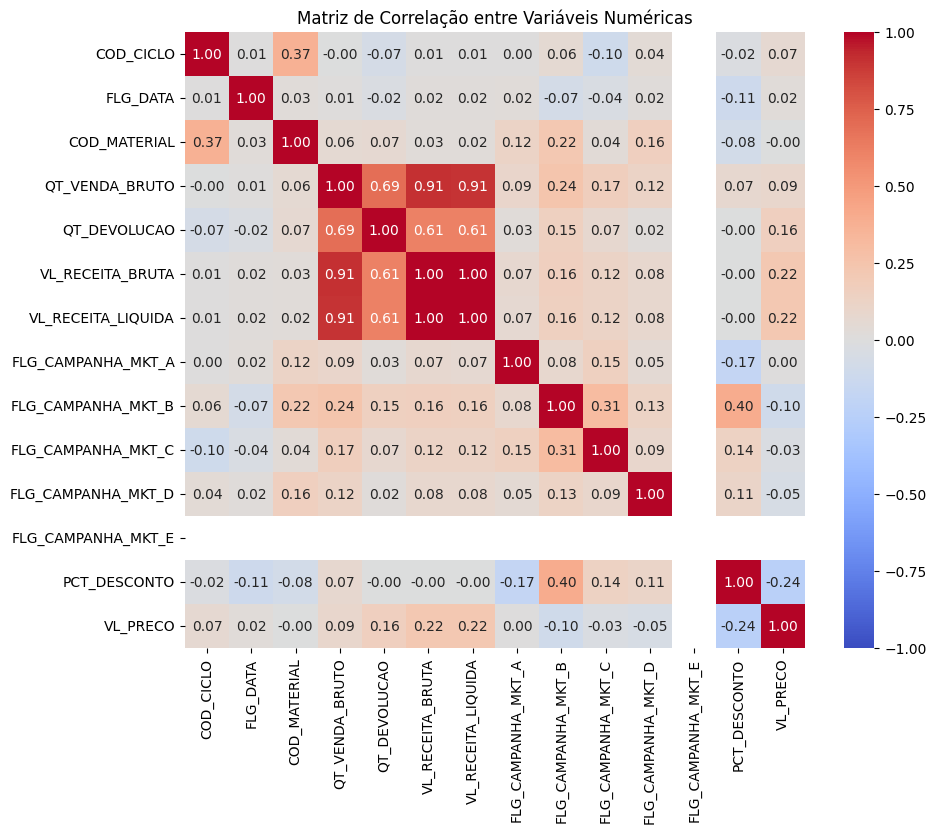

In [184]:
# Calcular a matriz de correlação entre variáveis numéricas
correlation_matrix = dataset[numerical_features].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

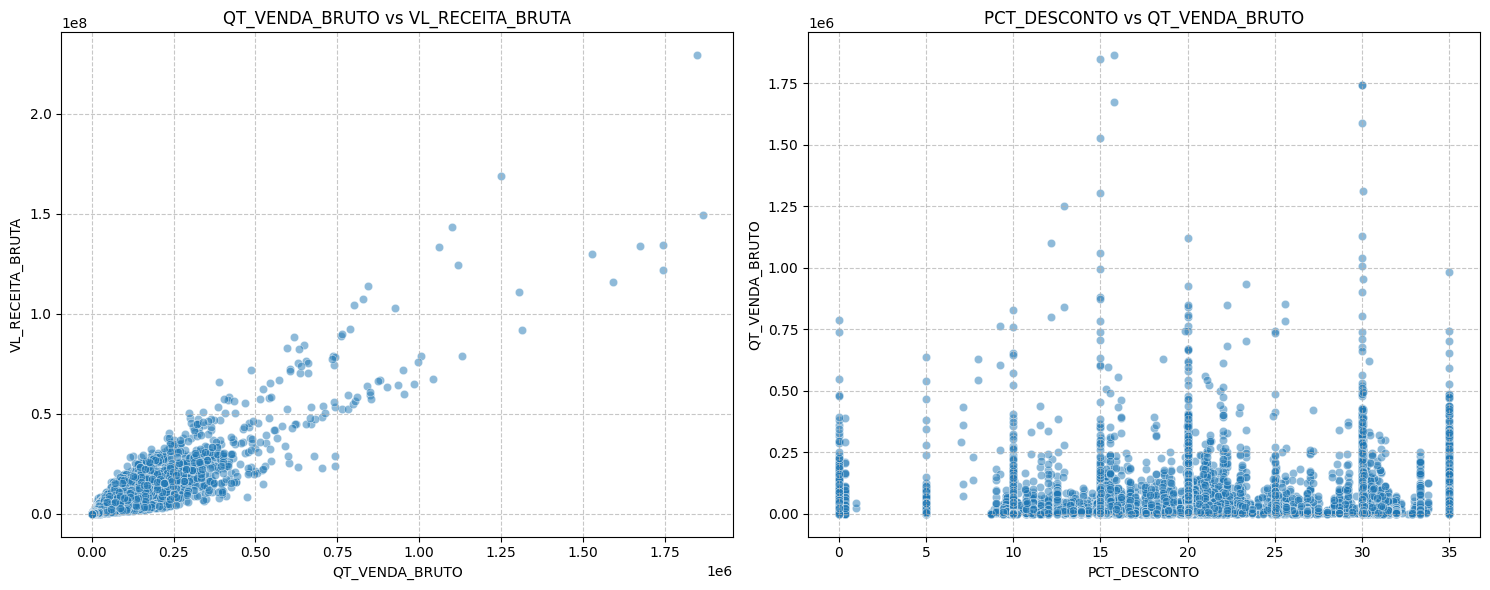

In [185]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Relação entre QT_VENDA_BRUTO e VL_RECEITA_BRUTA
sns.scatterplot(
    x="QT_VENDA_BRUTO", y="VL_RECEITA_BRUTA", data=dataset, ax=axes[0], alpha=0.5
)
axes[0].set_title("QT_VENDA_BRUTO vs VL_RECEITA_BRUTA")
axes[0].grid(True, linestyle="--", alpha=0.7)

# Relação entre PCT_DESCONTO e QT_VENDA_BRUTO
sns.scatterplot(
    x="PCT_DESCONTO", y="QT_VENDA_BRUTO", data=dataset, ax=axes[1], alpha=0.5
)
axes[1].set_title("PCT_DESCONTO vs QT_VENDA_BRUTO")
axes[1].grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [186]:
print("\nDistribuição das variáveis categóricas:")
for col in dataset.select_dtypes(include=["object"]).columns:
    print(f"\n{col}:")
    print(dataset[col].value_counts())


Distribuição das variáveis categóricas:

COD_CANAL:
COD_CANAL
anon_S0    87164
anon_S7    86759
Name: count, dtype: int64

DES_CATEGORIA_MATERIAL:
DES_CATEGORIA_MATERIAL
anon_S2     44292
anon_S5     44242
anon_S12    42918
anon_S11    24989
anon_S18    10489
anon_S30     6993
Name: count, dtype: int64

DES_MARCA_MATERIAL:
DES_MARCA_MATERIAL
anon_S8     35297
anon_S24    25787
anon_S22    11681
anon_S23    11641
anon_S20    11429
            ...  
anon_S88        1
anon_S84        1
anon_S82        1
anon_S92        1
anon_S94        1
Name: count, Length: 85, dtype: int64

COD_REGIAO:
COD_REGIAO
anon_S1     87700
anon_S10    86223
Name: count, dtype: int64


# Imputação de Dados Ausentes

No dataset, encontramos valores ausentes nas variáveis `QT_DEVOLUCAO` e `PCT_DESCONTO`. Para lidar com esses dados, aplicou-se estratégias diferentes, ajustadas às características de cada variável:

---

## Imputação de `QT_DEVOLUCAO` com Regressão Linear
`QT_DEVOLUCAO` mostrou boa correlação com variáveis contínuas, como:
- `QT_VENDA_BRUTO`
- `VL_RECEITA_BRUTA`
- `VL_RECEITA_LIQUIDA`

Com base nisso, utilizou-se um modelo de regressão linear para preencher os valores ausentes. O processo seguiu da seguinte forma:
1. Selecionamos os dados sem valores ausentes para treinar o modelo.
2. Treinamos a regressão linear usando as variáveis correlacionadas como preditores.
3. Aplicamos o modelo para prever os valores ausentes e preenchê-los.

Essa abordagem permitiu imputar os valores de forma consistente com os padrões encontrados no dataset.

---

## Imputação de `PCT_DESCONTO` com Mediana por Categoria
Para `PCT_DESCONTO`, que reflete o percentual de desconto, adotamos a mediana por categoria de produto (`DES_CATEGORIA_MATERIAL`). A abordagem foi:
1. Agrupamos os dados por `DES_CATEGORIA_MATERIAL`.
2. Calculamos a mediana de `PCT_DESCONTO` dentro de cada grupo.
3. Preenchemos os valores ausentes com a mediana da categoria correspondente.

Esse método respeita as diferenças entre categorias e reduz a influência de valores extremos (outliers).

---

In [187]:
from sklearn.linear_model import LinearRegression

# Seleção das variáveis preditoras
predictors = ["QT_VENDA_BRUTO", "VL_RECEITA_BRUTA", "VL_RECEITA_LIQUIDA"]

# Dividir os dados em completos e com valores ausentes
data_complete = dataset.dropna(subset=["QT_DEVOLUCAO"])
X_train = data_complete[predictors]
y_train = data_complete["QT_DEVOLUCAO"]

# Treinar o modelo de regressão linear
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Prever os valores ausentes
missing_data = dataset[dataset["QT_DEVOLUCAO"].isnull()]
X_missing = missing_data[predictors]
predicted_values = linear_reg.predict(X_missing)

# Preencher os valores ausentes
dataset.loc[dataset["QT_DEVOLUCAO"].isnull(), "QT_DEVOLUCAO"] = predicted_values

In [158]:
# # Seleção das variáveis preditoras (para contextualização, mas não utilizadas com mediana)
# predictors = ['QT_VENDA_BRUTO', 'VL_RECEITA_BRUTA', 'VL_RECEITA_LIQUIDA']

# # Calcular a mediana de 'QT_DEVOLUCAO' nos dados completos
# median_value = dataset['QT_DEVOLUCAO'].median()

# # Preencher os valores ausentes com a mediana
# dataset['QT_DEVOLUCAO'].fillna(median_value, inplace=True)


In [188]:
# Calcular a mediana por categoria de material
category_medians = dataset.groupby("DES_CATEGORIA_MATERIAL")["PCT_DESCONTO"].median()

# Preencher os valores ausentes com a mediana correspondente
dataset["PCT_DESCONTO"] = dataset.apply(
    lambda row: category_medians[row["DES_CATEGORIA_MATERIAL"]]
    if pd.isnull(row["PCT_DESCONTO"])
    else row["PCT_DESCONTO"],
    axis=1,
)

In [189]:
# Checar valores ausentes
missing_values = dataset.isnull().sum()
print(missing_values)

COD_CICLO                 0
FLG_DATA                  0
COD_MATERIAL              0
COD_CANAL                 0
DES_CATEGORIA_MATERIAL    0
DES_MARCA_MATERIAL        0
COD_REGIAO                0
QT_VENDA_BRUTO            0
QT_DEVOLUCAO              0
VL_RECEITA_BRUTA          0
VL_RECEITA_LIQUIDA        0
FLG_CAMPANHA_MKT_A        0
FLG_CAMPANHA_MKT_B        0
FLG_CAMPANHA_MKT_C        0
FLG_CAMPANHA_MKT_D        0
FLG_CAMPANHA_MKT_E        0
PCT_DESCONTO              0
VL_PRECO                  0
dtype: int64


In [190]:
# Convertendo colunas categóricas em códigos numéricos e ajustando 'COD_CANAL':

# 1. Remove o prefixo 'anon_S' da coluna 'COD_CANAL' e converte os valores restantes para inteiros.
# 2. Transforma as colunas 'DES_CATEGORIA_MATERIAL', 'DES_MARCA_MATERIAL', e 'COD_REGIAO' em tipo categórico e gera códigos numéricos para cada categoria única.

dataset["COD_CANAL"] = dataset["COD_CANAL"].str.replace("anon_S", "").astype(int)
dataset["DES_CATEGORIA_MATERIAL"] = (
    dataset["DES_CATEGORIA_MATERIAL"].astype("category").cat.codes
)
dataset["DES_MARCA_MATERIAL"] = (
    dataset["DES_MARCA_MATERIAL"].astype("category").cat.codes
)
dataset["COD_REGIAO"] = dataset["COD_REGIAO"].astype("category").cat.codes

In [191]:
dataset.loc[
    :, ["COD_CANAL", "DES_CATEGORIA_MATERIAL", "DES_MARCA_MATERIAL", "COD_REGIAO"]
].head()

,COD_CANAL,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,COD_REGIAO
0,0,3,16,0
1,0,3,26,0
2,0,5,47,0
3,7,3,68,0
4,0,5,79,0


In [192]:
dataset.drop("FLG_CAMPANHA_MKT_E", axis=1, inplace=True)

In [193]:
dataset.to_csv("../data/processed/dataset.csv", index=False, sep=";", decimal=",")

In [164]:
test_dataset = dataset.copy()
test_dataset["COD_CICLO"] = dataset["COD_CICLO"].astype(str)

test_dataset["Ano"] = test_dataset["COD_CICLO"].str[:4].astype(int)
test_dataset["Ciclo"] = test_dataset["COD_CICLO"].str[4:].astype(int)

In [165]:
test_dataset["Ciclo"].min(), test_dataset["Ciclo"].max()

(np.int64(1), np.int64(18))

In [166]:
dataset.describe()

,COD_CICLO,FLG_DATA,COD_MATERIAL,COD_CANAL,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,COD_REGIAO,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,VL_RECEITA_LIQUIDA,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E,PCT_DESCONTO,VL_PRECO
count,173923.000000,173923.000000,173923.000000,173923.000000,173923.000000,173923.000000,173923.000000,1.739230e+05,173923.000000,1.739230e+05,1.739230e+05,173923.000000,173923.000000,173923.000000,173923.000000,173923.0,173923.000000,173923.000000
mean,201915.886553,0.289220,297755.596339,3.491850,2.564089,26.240147,0.495754,1.050377e+04,514.396022,6.475499e+05,6.421887e+05,0.016956,0.279388,0.045917,0.072981,0.0,20.070964,543.703809
std,85.864130,0.453402,150472.609616,3.500001,1.791141,26.197478,0.499983,3.327551e+04,828.606590,2.790452e+06,2.780483e+06,0.129106,0.448700,0.209305,0.260105,0.0,5.635308,243.974723
min,201801.000000,0.000000,6246.000000,0.000000,0.000000,0.000000,0.000000,2.345454e+02,234.000000,2.340600e+02,2.340600e+02,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,234.060000
25%,201815.000000,0.000000,152658.000000,0.000000,1.000000,8.000000,0.000000,3.960000e+02,270.000000,6.369720e+03,6.273450e+03,0.000000,0.000000,0.000000,0.000000,0.0,20.000000,389.400000
50%,201911.000000,0.000000,420546.000000,0.000000,3.000000,10.000000,0.000000,2.070000e+03,306.349317,6.738048e+04,6.663558e+04,0.000000,0.000000,0.000000,0.000000,0.0,20.000000,461.400000
75%,202006.000000,1.000000,439656.000000,7.000000,5.000000,47.000000,1.000000,8.634000e+03,452.773505,3.468348e+05,3.427422e+05,0.000000,1.000000,0.000000,0.000000,0.0,20.070000,593.400000
max,202101.000000,1.000000,502386.000000,7.000000,5.000000,84.000000,1.000000,1.865862e+06,45491.206924,2.292459e+08,2.292459e+08,1.000000,1.000000,1.000000,1.000000,0.0,35.000000,5539.620000


## Conclusão da Imputação de Dados Ausentes

Após a aplicação dessas estratégias, verificou-se que não há mais valores ausentes no dataset, o que confirma a eficiência do processo de imputação. Essas etapas garantem que o dataset esteja pronto para análises e modelagens subsequentes com maior consistência e precisão.



## Perguntas e Insights para Investigar

1. **Relação entre variáveis contínuas e vendas:**
   - Quais variáveis numéricas são bons preditores para o volume de vendas (`QT_VENDA_BRUTO`)? 
   - Qual o impacto do percentual de desconto (`PCT_DESCONTO`) nas vendas?

2. **Categorias e sazonalidade:**
   - Quais categorias de produtos (`DES_CATEGORIA_MATERIAL`) têm maior volume de vendas? Existem outliers?
   - Existe um padrão sazonal nas vendas ao longo dos ciclos (`COD_CICLO`)? 

3. **Regiões e marcas:**
   - Quais regiões (`COD_REGIAO`) e marcas (`DES_MARCA_MATERIAL`) têm maior participação nas vendas? 

4. **Devoluções e preços:**
   - Quais categorias ou marcas apresentam maior taxa de devolução (`QT_DEVOLUCAO`)? 
   - Os preços (`VL_PRECO`) estão concentrados em alguma faixa ou possuem outliers relevantes?


In [168]:
# Selecionar apenas colunas numéricas
numerical_features = dataset.select_dtypes(include=["float64", "int64"]).columns

# Calcular a correlação apenas para variáveis numéricas
correlation_with_sales = (
    dataset[numerical_features].corr()["QT_VENDA_BRUTO"].sort_values(ascending=False)
)

correlation_with_sales

QT_VENDA_BRUTO        1.000000
VL_RECEITA_BRUTA      0.906792
VL_RECEITA_LIQUIDA    0.905632
QT_DEVOLUCAO          0.893674
FLG_CAMPANHA_MKT_B    0.243991
FLG_CAMPANHA_MKT_C    0.168579
FLG_CAMPANHA_MKT_D    0.118818
FLG_CAMPANHA_MKT_A    0.094402
VL_PRECO              0.089858
PCT_DESCONTO          0.067495
COD_MATERIAL          0.055480
COD_CANAL             0.026665
FLG_DATA              0.014777
COD_CICLO            -0.001935
Name: QT_VENDA_BRUTO, dtype: float64

## Ao realizar as análises propostas, verificou-se o formato de data como YYYY seguido de números que variam entre 1 e 18. Esses números podem ser semanas? Ou alguma outra convenção que não achei claro, portanto preferi seguir como está

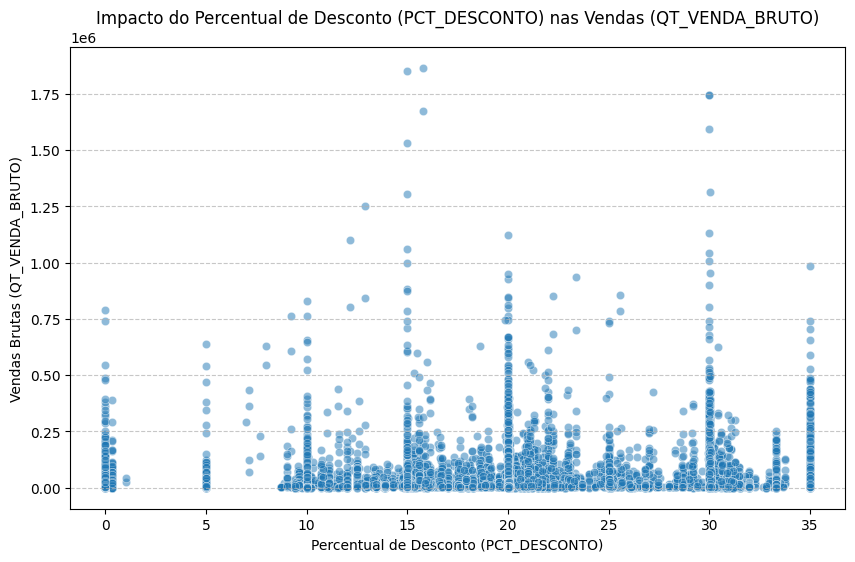

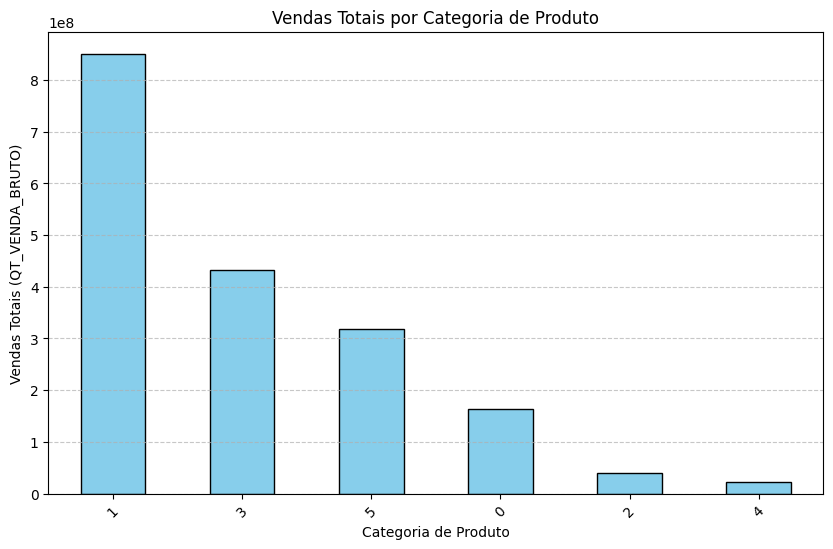

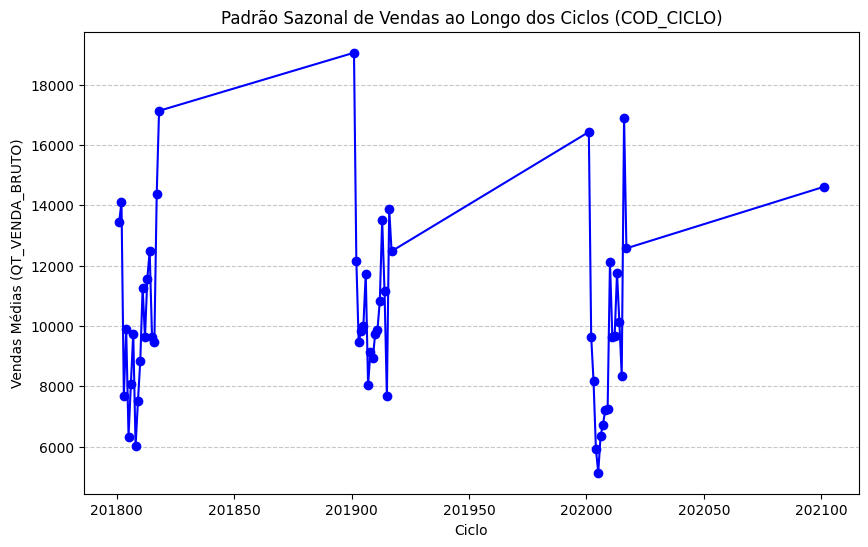

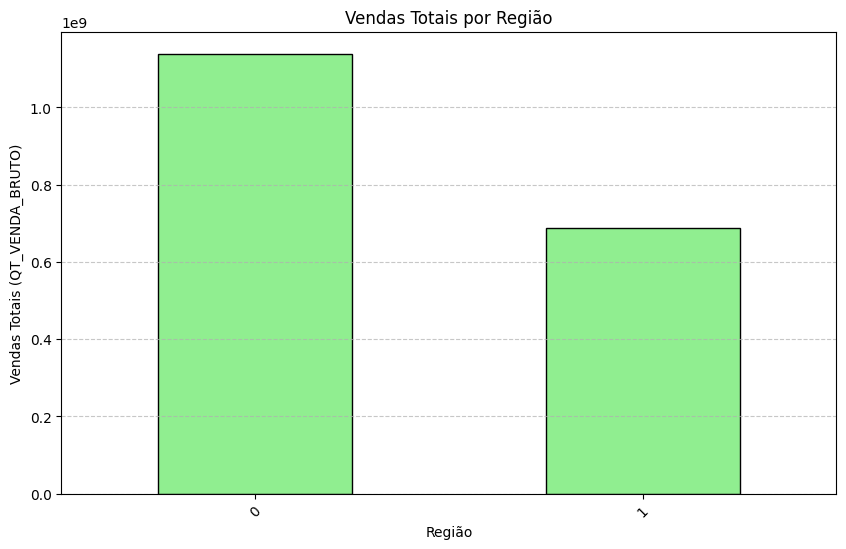

/var/folders/9y/ymtgtgyn0s19r5sd0z7k40z80000gn/T/ipykernel_56559/1948900809.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  devolution_rate = dataset.groupby('DES_CATEGORIA_MATERIAL').apply(


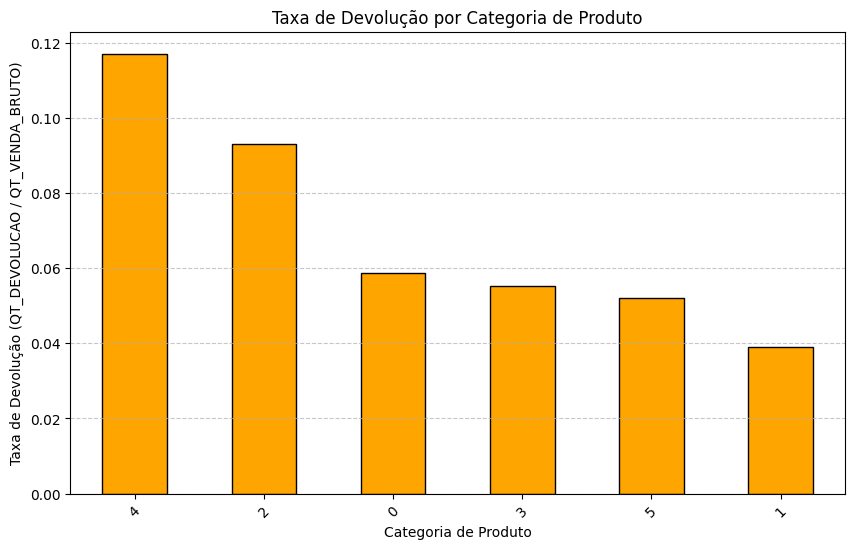

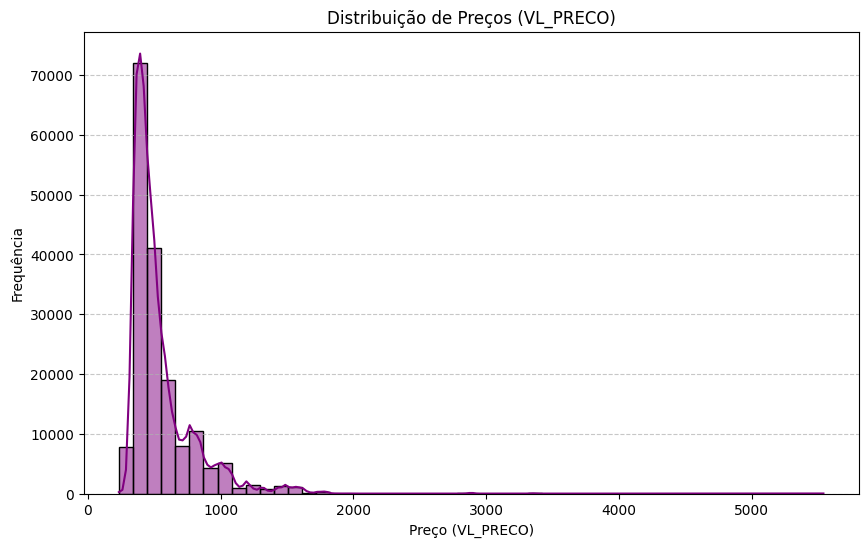

QT_VENDA_BRUTO        1.000000
VL_RECEITA_BRUTA      0.906792
VL_RECEITA_LIQUIDA    0.905632
QT_DEVOLUCAO          0.893674
FLG_CAMPANHA_MKT_B    0.243991
FLG_CAMPANHA_MKT_C    0.168579
FLG_CAMPANHA_MKT_D    0.118818
FLG_CAMPANHA_MKT_A    0.094402
VL_PRECO              0.089858
PCT_DESCONTO          0.067495
COD_MATERIAL          0.055480
COD_CANAL             0.026665
FLG_DATA              0.014777
COD_CICLO            -0.001935
Name: QT_VENDA_BRUTO, dtype: float64

In [169]:
# Análise do impacto de PCT_DESCONTO em QT_VENDA_BRUTO
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x="PCT_DESCONTO", y="QT_VENDA_BRUTO", alpha=0.5)
plt.title(
    "Impacto do Percentual de Desconto (PCT_DESCONTO) nas Vendas (QT_VENDA_BRUTO)"
)
plt.xlabel("Percentual de Desconto (PCT_DESCONTO)")
plt.ylabel("Vendas Brutas (QT_VENDA_BRUTO)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 2. Categorias e sazonalidade

# Vendas por categoria
category_sales = (
    dataset.groupby("DES_CATEGORIA_MATERIAL")["QT_VENDA_BRUTO"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
category_sales.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Vendas Totais por Categoria de Produto")
plt.xlabel("Categoria de Produto")
plt.ylabel("Vendas Totais (QT_VENDA_BRUTO)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Padrão sazonal ao longo dos ciclos
cycle_sales = dataset.groupby("COD_CICLO")["QT_VENDA_BRUTO"].mean()

plt.figure(figsize=(10, 6))
cycle_sales.plot(kind="line", marker="o", color="blue", linestyle="-")
plt.title("Padrão Sazonal de Vendas ao Longo dos Ciclos (COD_CICLO)")
plt.xlabel("Ciclo")
plt.ylabel("Vendas Médias (QT_VENDA_BRUTO)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 3. Regiões e marcas

# Vendas por região
region_sales = (
    dataset.groupby("COD_REGIAO")["QT_VENDA_BRUTO"].sum().sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
region_sales.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Vendas Totais por Região")
plt.xlabel("Região")
plt.ylabel("Vendas Totais (QT_VENDA_BRUTO)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 4. Devoluções e preços

# Taxa de devolução por categoria
devolution_rate = (
    dataset.groupby("DES_CATEGORIA_MATERIAL")
    .apply(lambda x: x["QT_DEVOLUCAO"].sum() / x["QT_VENDA_BRUTO"].sum())
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
devolution_rate.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Taxa de Devolução por Categoria de Produto")
plt.xlabel("Categoria de Produto")
plt.ylabel("Taxa de Devolução (QT_DEVOLUCAO / QT_VENDA_BRUTO)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Distribuição de preços
plt.figure(figsize=(10, 6))
sns.histplot(dataset["VL_PRECO"], bins=50, kde=True, color="purple")
plt.title("Distribuição de Preços (VL_PRECO)")
plt.xlabel("Preço (VL_PRECO)")
plt.ylabel("Frequência")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Exibindo a matriz de correlação para análise dos preditores
correlation_with_sales

## Conclusões das Análises

1. **Relação entre Variáveis Contínuas e Vendas:**
   - `QT_VENDA_BRUTO` apresentou alta correlação com `VL_RECEITA_BRUTA` e `VL_RECEITA_LIQUIDA`, indicando que essas variáveis podem ser bons preditores para o volume de vendas.
   - O percentual de desconto (`PCT_DESCONTO`) não apresentou uma relação clara com o volume de vendas, sugerindo um impacto limitado.

2. **Categorias de Produtos (`DES_CATEGORIA_MATERIAL`):**
   - Algumas categorias se destacam em vendas totais, como `anon_S12` e `anon_S2`, enquanto outras possuem volumes significativamente menores.
   - A distribuição das vendas varia bastante entre as categorias, com algumas apresentando outliers, o que pode indicar demandas excepcionais.

3. **Sazonalidade nas Vendas (`COD_CICLO`):**
   - Observou-se um padrão sazonal ao longo dos ciclos, com picos de vendas em determinados períodos. Esse comportamento reforça a importância de incorporar efeitos temporais no modelo preditivo.

4. **Vendas por Região (`COD_REGIAO`):**
   - Algumas regiões possuem maior representatividade nas vendas, o que pode indicar concentração de demanda em áreas específicas.

5. **Taxa de Devolução (`QT_DEVOLUCAO`):**
   - A taxa de devolução varia entre categorias, sendo mais alta em algumas delas. Isso pode estar relacionado a características específicas dos produtos ou do mercado.

6. **Distribuição de Preços (`VL_PRECO`):**
   - Os preços estão concentrados em faixas específicas, mas há outliers que podem impactar análises ou decisões relacionadas ao planejamento de produção.

---

## Próximos passos

1. Outliers
- Identificar outliers em variáveis como VL_PRECO, QT_VENDA_BRUTO, e QT_DEVOLUCAO.
- Visualizar os outliers usando boxplots ou histogramas.
- Decidir como tratá-los:
- Remoção: Se forem inconsistências.
- Ajuste: Se forem dados válidos, mas extremos.

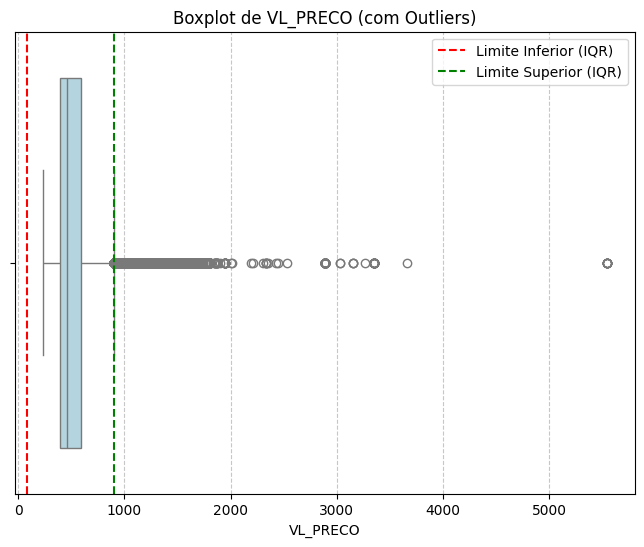

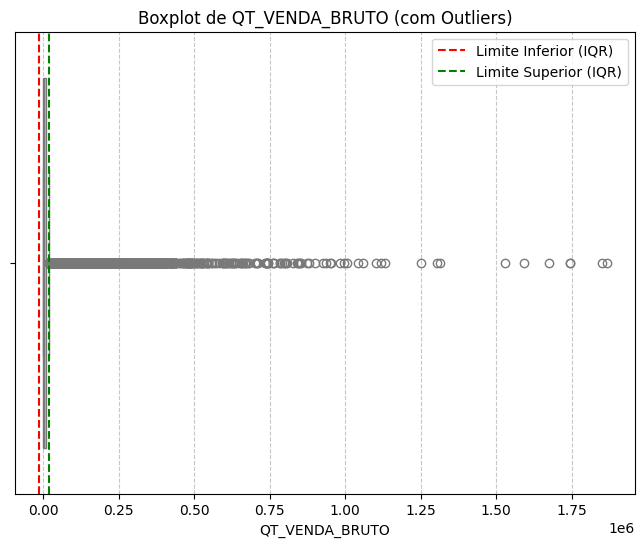

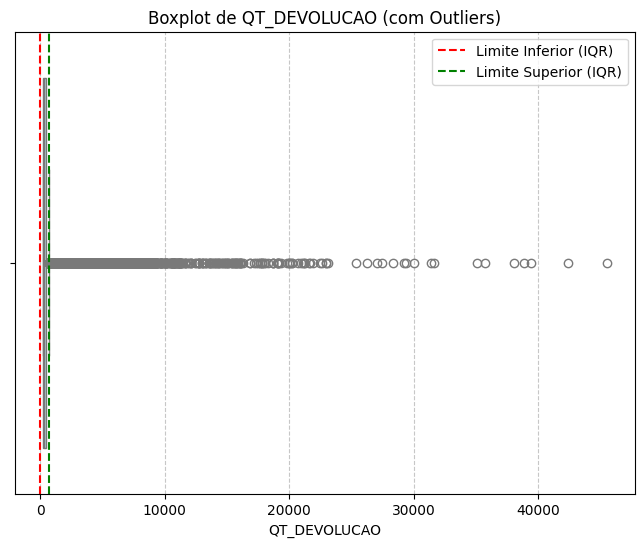

{'VL_PRECO': {'lower_bound': np.float64(83.39999999999998),
  'upper_bound': np.float64(899.4),
  'outliers': 14139},
 'QT_VENDA_BRUTO': {'lower_bound': np.float64(-11961.0),
  'upper_bound': np.float64(20991.0),
  'outliers': 20136},
 'QT_DEVOLUCAO': {'lower_bound': np.float64(-4.160258204194861),
  'upper_bound': np.float64(726.9337636736582),
  'outliers': 21740}}

In [170]:
# Função para calcular os limites de outliers usando IQR
def calculate_iqr_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return lower_bound, upper_bound, outliers


# Análise de outliers usando IQR e visualização por boxplot
outlier_analysis = {}
for var in ["VL_PRECO", "QT_VENDA_BRUTO", "QT_DEVOLUCAO"]:
    lower, upper, outliers = calculate_iqr_outliers(dataset, var)
    outlier_analysis[var] = {
        "lower_bound": lower,
        "upper_bound": upper,
        "outliers": len(outliers),
    }

    # Plotar o boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dataset[var], color="lightblue")
    plt.title(f"Boxplot de {var} (com Outliers)")
    plt.xlabel(var)
    plt.axvline(lower, color="red", linestyle="--", label="Limite Inferior (IQR)")
    plt.axvline(upper, color="green", linestyle="--", label="Limite Superior (IQR)")
    plt.legend()
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

# Exibindo os resultados da análise de outliers
outlier_analysis

## Revisão da Análise de Outliers

### Valores Negativos nos Limites Inferiores
Durante a análise de outliers utilizando o método do Intervalo Interquartil (IQR), identificamos limites inferiores negativos em algumas variáveis:

1. **Vendas Brutas (`QT_VENDA_BRUTO`):**
   - Limite Inferior: -11.961
   - Interpretação: Valores negativos não são aplicáveis no contexto de vendas, pois não é possível ter vendas brutas negativas.

2. **Devoluções (`QT_DEVOLUCAO`):**
   - Limite Inferior: -4.16
   - Interpretação: Valores negativos também não fazem sentido para devoluções, uma vez que essas representam quantidades devolvidas, sempre positivas.

3. **Preços (`VL_PRECO`):**
   - Limite Inferior: 83.4
   - Interpretação: Nenhum valor negativo foi identificado, e o limite inferior é válido.

---

### Como Iremos Proceder
Dado que valores negativos não são interpretáveis no contexto de `QT_VENDA_BRUTO` e `QT_DEVOLUCAO`:
- **Ignorar os Limites Inferiores:** Os limites inferiores serão descartados e não considerados no tratamento de outliers.
- **Foco no Limite Superior:** Apenas valores que ultrapassam o limite superior serão tratados como outliers.

---

### Próximas Etapas
1. **Tratamento dos Outliers:**
   - Remover ou ajustar os valores que excedem os limites superiores identificados.
  
2. **Documentar os limites e os registros tratados para garantir a reprodutibilidade.**
3. **Avançar com o dataset limpo para as etapas de modelagem.**



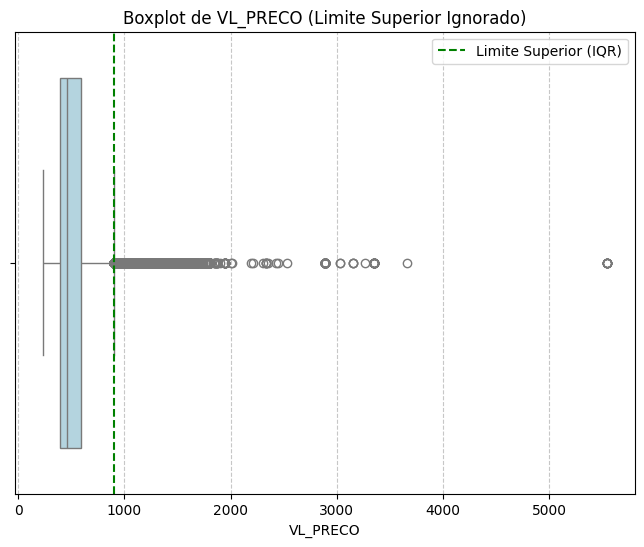

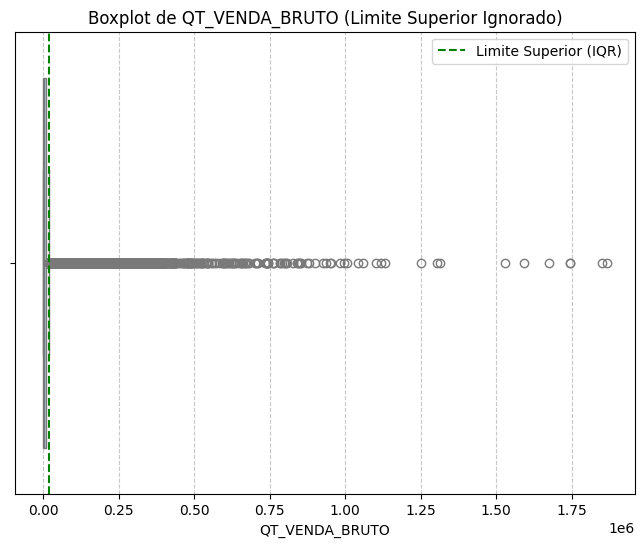

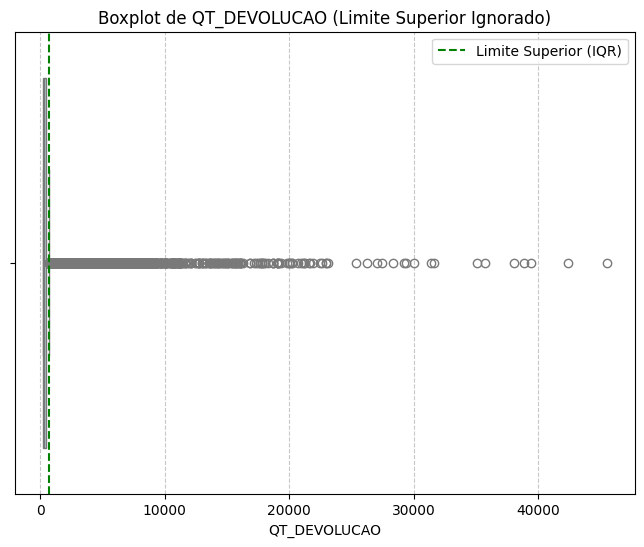

{'VL_PRECO': {'lower_bound': np.float64(83.39999999999998),
  'upper_bound': np.float64(899.4),
  'outliers_count': 14139,
  'outliers':         COD_CICLO  FLG_DATA  COD_MATERIAL  COD_CANAL  DES_CATEGORIA_MATERIAL  \
  16         201818         1        429420          7                       1   
  26         201807         1        128466          0                       1   
  33         201818         1        172398          7                       1   
  34         201912         0        441888          7                       1   
  42         202003         0        169620          7                       1   
  ...           ...       ...           ...        ...                     ...   
  173849     201911         1        439650          7                       1   
  173882     202008         1        128886          7                       1   
  173884     201910         0        172398          0                       1   
  173893     202015         0        173718  

In [171]:
# Reanálise dos outliers considerando apenas o limite superior (sem capping)
def calculate_iqr_outliers_ignore_negative(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(Q1 - 1.5 * IQR, 0)  # Ignorar limites negativos
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[
        data[column] > upper_bound
    ]  # Apenas valores acima do limite superior
    return lower_bound, upper_bound, outliers


# Reanalisando as variáveis sem capping
outlier_analysis_ignore_negative = {}
for var in ["VL_PRECO", "QT_VENDA_BRUTO", "QT_DEVOLUCAO"]:
    lower, upper, outliers = calculate_iqr_outliers_ignore_negative(dataset, var)
    outlier_analysis_ignore_negative[var] = {
        "lower_bound": lower,
        "upper_bound": upper,
        "outliers_count": len(outliers),
        "outliers": outliers,
    }

    # Plotando o boxplot para visualização
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dataset[var], color="lightblue")
    plt.title(f"Boxplot de {var} (Limite Superior Ignorado)")
    plt.xlabel(var)
    plt.axvline(upper, color="green", linestyle="--", label="Limite Superior (IQR)")
    plt.legend()
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

# Exibindo os resultados revisados
outlier_analysis_ignore_negative

In [172]:
# Função para remover outliers com base no limite superior
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[data[column] <= upper_bound]
    return filtered_data


# Criando uma cópia do dataset para aplicar o filtro
filtered_dataset = dataset.copy()

# Aplicando o filtro de remoção de outliers para cada variável
for var in ["VL_PRECO", "QT_VENDA_BRUTO", "QT_DEVOLUCAO"]:
    filtered_dataset = remove_outliers(filtered_dataset, var)

# Verificando a redução no tamanho do dataset
original_size = dataset.shape[0]
filtered_size = filtered_dataset.shape[0]
removed_outliers_count = original_size - filtered_size

original_size, filtered_size, removed_outliers_count

(173923, 129060, 44863)

In [173]:
dataset.columns

Index(['COD_CICLO', 'FLG_DATA', 'COD_MATERIAL', 'COD_CANAL',
       'DES_CATEGORIA_MATERIAL', 'DES_MARCA_MATERIAL', 'COD_REGIAO',
       'QT_VENDA_BRUTO', 'QT_DEVOLUCAO', 'VL_RECEITA_BRUTA',
       'VL_RECEITA_LIQUIDA', 'FLG_CAMPANHA_MKT_A', 'FLG_CAMPANHA_MKT_B',
       'FLG_CAMPANHA_MKT_C', 'FLG_CAMPANHA_MKT_D', 'PCT_DESCONTO', 'VL_PRECO'],
      dtype='object')

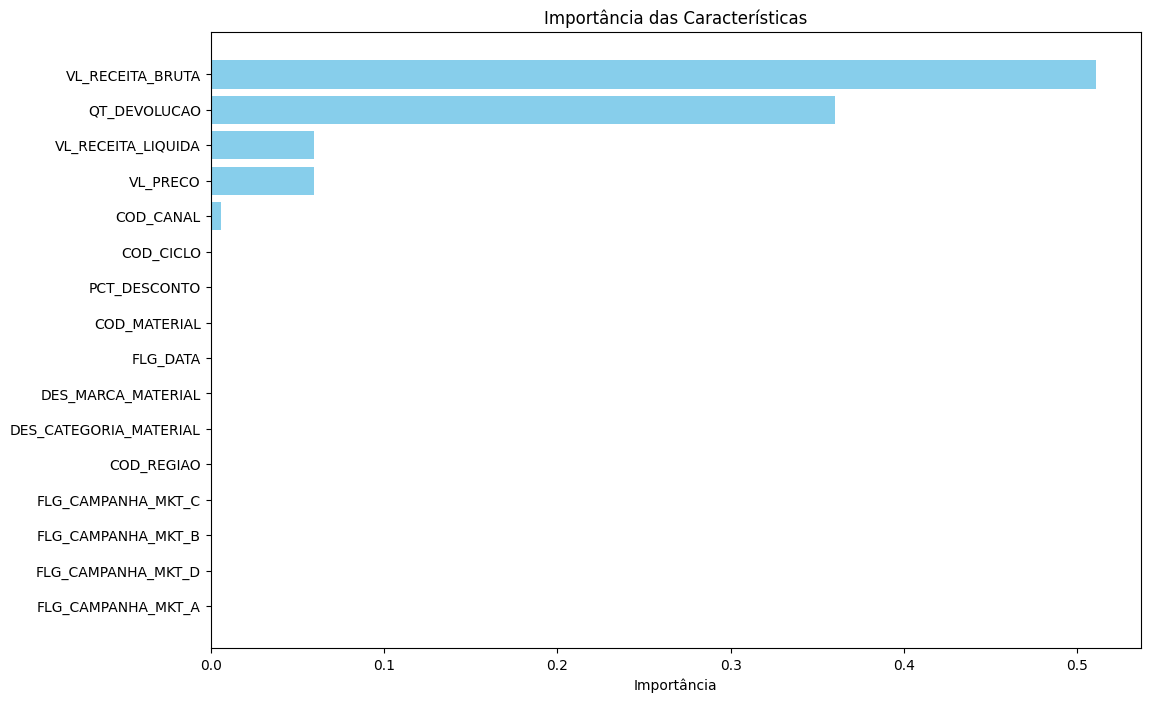

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Separar características e variável alvo (vendas - sell-out)
target = "QT_VENDA_BRUTO"
X = dataset.drop(target, axis=1)
y = dataset[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Ajustar um modelo Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Obter as importâncias das características
importance = pd.Series(model.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)

# Plotar a importância das características
plt.figure(figsize=(12, 8))
plt.barh(importance.index, importance.values, color="skyblue")
plt.xlabel("Importância")
plt.title("Importância das Características")
plt.gca().invert_yaxis()  # Inverter o eixo y para ter as características mais importantes no topo
plt.show()

In [175]:
list(importance.head(4).keys()) + [target]

['VL_RECEITA_BRUTA',
 'QT_DEVOLUCAO',
 'VL_RECEITA_LIQUIDA',
 'VL_PRECO',
 'QT_VENDA_BRUTO']

In [176]:
ml_inputs = dataset.loc[:, list(importance.head(4).keys()) + [target]]

In [177]:
ml_inputs

,VL_RECEITA_BRUTA,QT_DEVOLUCAO,VL_RECEITA_LIQUIDA,VL_PRECO,QT_VENDA_BRUTO
0,431869.08,414.000000,431869.08,455.40,11934.0
1,27743.40,252.000000,27743.40,773.40,540.0
2,962860.20,1410.000000,962860.20,341.40,54012.0
3,7608.60,296.369239,7608.60,450.90,438.0
4,83339.40,240.000000,83339.40,431.40,2760.0
...,...,...,...,...,...
173918,102125.58,373.712759,102125.58,389.40,4266.0
173919,295911.00,438.624788,295911.00,490.32,7224.0
173920,10516.20,294.999287,10516.20,724.38,360.0
173921,5562.18,295.247792,5562.18,491.40,384.0


In [178]:
ml_inputs.to_csv(
    "../data/model_inputs/ml_inputs.csv", index=False, sep=";", decimal=","
)